<img src="../../img/hierarchical.png" width="750" height="300">  
<img src="../../img/hierarchical_1.png" width="750" height="300">  

treshold(euclidean distance) değeri 3 için 2 tane, 2 için 3 tane cluster vardır.

<img src="../../img/hierarchical_2.png" width="750" height="300">  

Yatay da kesilmeyen dikey en uzun uzunluk alınır ve oradan treshold çizilir ve oradan cluster sayısı alınır euclidian distance değeri belirlenir.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

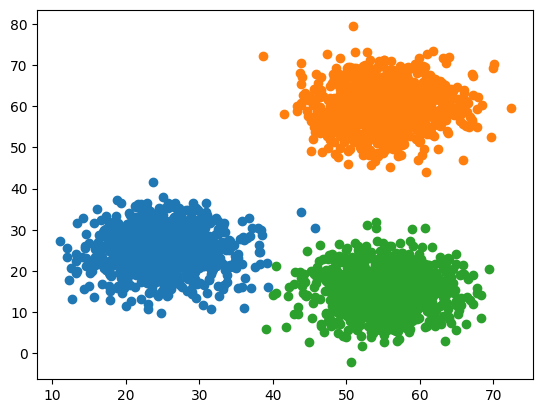

In [2]:
# 25 ortalamaya,5 sigmaya sahip 1000 değer üret. 
# Verilen sigma değeri ile verinin 666 tanesi 20 ile 30 arasında(Gauss dağılımı) olacak.

# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

# concatenate --> birleştirmek --> x'ler ve y'ler tek bir sütunda toplandı.
x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

# Bir sözlükte birleştirildi.
dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

## Dendrogram

In [3]:
from scipy.cluster.hierarchy import linkage,dendrogram

<function matplotlib.pyplot.show(close=None, block=None)>

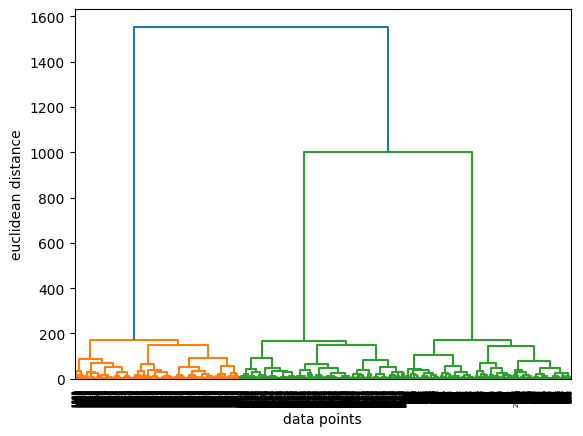

In [4]:
# ward metodu --> Cluster içindeki yayılımları minimalize eder.
merg = linkage(data,method="ward")

# leaf_rotation --> data pointlerin dik olmasını sağlar
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show

<img src="../../img/hierarchical_3.png" width="750" height="300">  

Kırmızı dikey de en yüksek distance sahip olduğundan oradan treshold alınır.

## HIERARCHICAL CLUSTERING

In [5]:
# AgglomerativeClustering --> (Tümevarım) Herbir clusteringden adım adım giderek tek bir cluster haline getirme.
from sklearn.cluster import AgglomerativeClustering

In [7]:
# n_clusters(3) dendrogramdan bulundu. 
# affinity(mesafe) --> eclidean distance
# ward --> Cluster içindeki yayılımları minimalize eder.
hiyerarchical_cluster = AgglomerativeClustering(n_clusters = 3,affinity="euclidean",linkage="ward")
cluster = hiyerarchical_cluster.fit_predict(data)